## 设置Matplotlib中文字体

In [70]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [71]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [72]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2025-04-28 20:17:45--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  10.1MB/s    用时 0.9s    

2025-04-28 20:17:46 (10.1 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



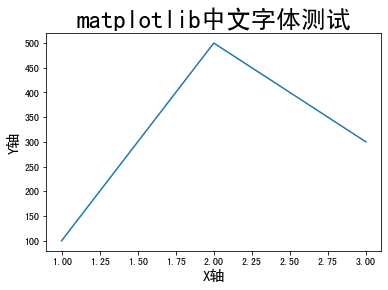

In [73]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [74]:
import os
# os.chdir('mmsegmentation')

In [75]:
os.getcwd()

'/home/featurize/work/MMSegmentation_Tutorials-main/20230215/【D1】Kaggle代码实战-肾小球切片语义分割'

## 导入工具包

In [76]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [77]:
# 日志文件路径
log_path = './work_dirs/tutorial/20250428_181827/vis_data/scalars.json'

In [78]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [79]:
len(json_list)

540

In [80]:
eval(json_list[4])

{'lr': 0.00994451655954398,
 'data_time': 0.008812427520751953,
 'loss': 0.08470293432474137,
 'decode.loss_ce': 0.031753552216105166,
 'decode.loss_dice': 0.02067215330898762,
 'decode.acc_seg': 99.78209686279297,
 'aux.loss_ce': 0.013298557425150648,
 'aux.loss_dice': 0.01897866977378726,
 'aux.acc_seg': 99.19650268554688,
 'time': 0.21477198600769043,
 'iter': 250,
 'memory': 3906,
 'step': 250}

In [81]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [82]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.loss_dice,decode.acc_seg,aux.loss_ce,aux.loss_dice,aux.acc_seg,time,iter,memory,step
0,0.009989,0.008429,0.172718,0.064936,0.057145,99.761345,0.026557,0.024080,99.761345,0.214061,50.0,6418.0,50.0
1,0.009978,0.010633,0.129236,0.044749,0.042557,97.899284,0.022643,0.019287,97.899284,0.217128,100.0,3906.0,100.0
2,0.009967,0.012756,0.119468,0.051485,0.028190,97.952171,0.022955,0.016839,97.728539,0.221365,150.0,3906.0,150.0
3,0.009956,0.008673,0.089835,0.040381,0.017630,98.794479,0.017099,0.014725,98.692726,0.216347,200.0,3906.0,200.0
4,0.009945,0.008812,0.084703,0.031754,0.020672,99.782097,0.013299,0.018979,99.196503,0.214772,250.0,3906.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.004489,0.010234,0.017341,0.008440,0.003262,99.685944,0.003728,0.001911,99.654114,0.217093,23800.0,3906.0,23800.0
476,0.004477,0.012156,0.022609,0.011594,0.003425,99.719307,0.005750,0.001840,99.705688,0.219493,23850.0,3906.0,23850.0
477,0.004464,0.011818,0.015077,0.008044,0.001876,100.000000,0.004091,0.001066,100.000000,0.217162,23900.0,3906.0,23900.0
478,0.004452,0.011369,0.005460,0.002339,0.001112,100.000000,0.001262,0.000747,100.000000,0.217852,23950.0,3906.0,23950.0


In [83]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,98.21,68.50,89.10,77.51,77.51,71.39,89.10,0.003453,0.056312,400.0
1,99.47,82.92,86.50,89.76,89.76,93.68,86.50,0.002562,0.052170,800.0
2,95.85,59.70,92.95,68.03,68.03,62.05,92.95,0.002195,0.046804,1200.0
3,98.71,74.72,95.90,83.33,83.33,76.32,95.90,0.003104,0.057822,1600.0
4,99.59,87.14,92.52,92.65,92.65,92.78,92.52,0.002903,0.052256,2000.0
5,99.58,87.13,92.99,92.64,92.64,92.30,92.99,0.003137,0.056366,2400.0
6,98.58,49.29,50.00,49.64,99.28,98.58,50.00,0.003033,0.052644,2800.0
7,99.59,85.93,87.62,91.85,91.85,97.18,87.62,0.003164,0.055679,3200.0
8,99.50,83.05,84.69,89.85,89.85,96.87,84.69,0.003055,0.053380,3600.0
9,99.64,87.90,90.69,93.14,93.14,95.93,90.69,0.003073,0.054769,4000.0


## 导出训练日志表格

In [84]:
df_train.to_csv('./mmsegmentation/图表/训练日志-训练集4.csv', index=False)
df_test.to_csv('./mmsegmentation/图表/训练日志-测试集4.csv', index=False)

## 可视化辅助函数

In [85]:
from matplotlib import colors as mcolors
import random
random.seed(253)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [86]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

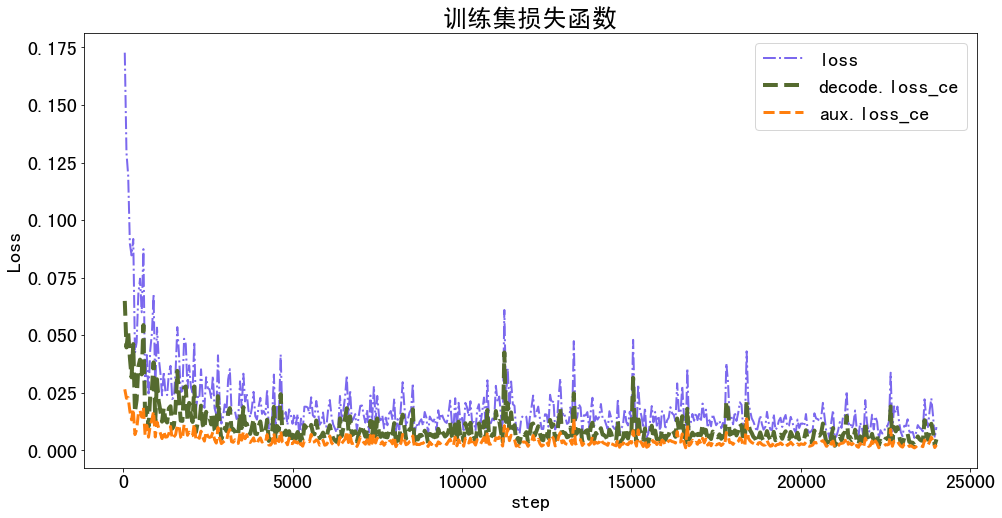

In [87]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/训练集损失函数4.pdf', dpi=240, bbox_inches='tight')

plt.show()

## 训练集准确率

In [88]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

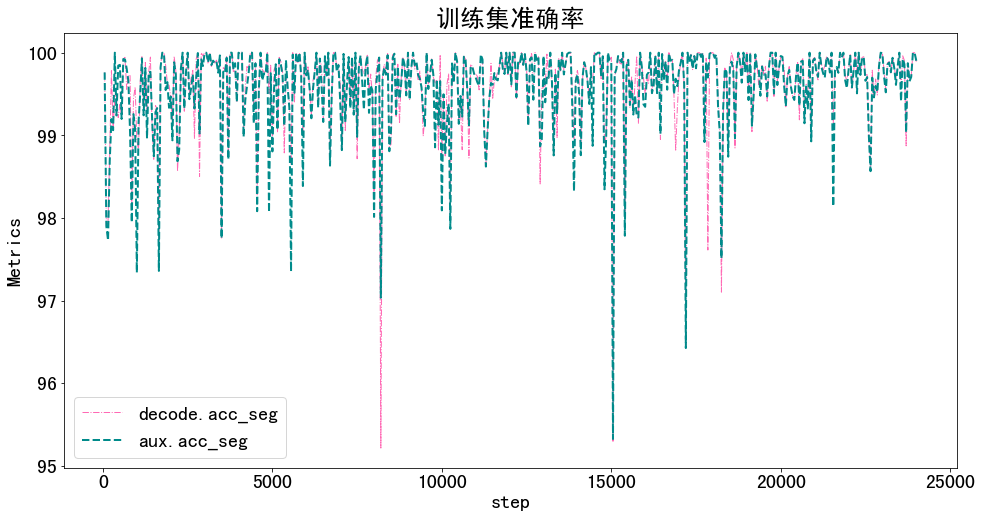

In [89]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/训练集准确率4.pdf', dpi=240, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [90]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [91]:
metrics = ['aAcc', 'mIoU', 'mRecall', 'mPrecision', 'mFscore', 'mDice']#, 'mAcc']

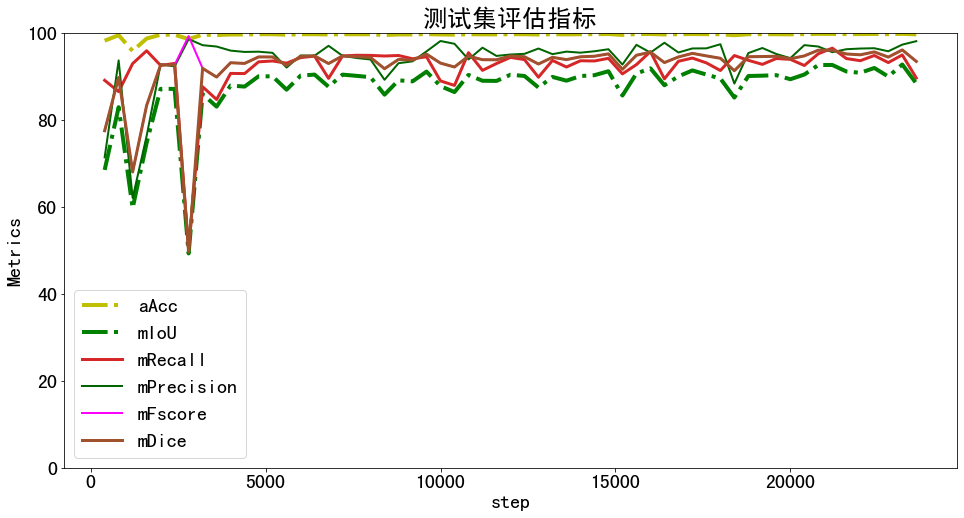

In [92]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/测试集分类评估指标4.pdf', dpi=240, bbox_inches='tight')

plt.show()